# Homework 2
-   **Name:**  Victor Hugo Gomez Soto 
-  **e-mail:** -- victor.gomez2701@alumnos.udg.mx --


# MODULES

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import wrapcauchy, levy_stable
import math
# from scipy.stats import cauchy


# CLASSES

In [37]:
# Clase Vec2d para manejar vectores 2D
class Vec2d:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __add__(self, other):
        return Vec2d(self.x + other.x, self.y + other.y)
    
    def rotated(self, angle):
        cos_a = np.cos(angle)
        sin_a = np.sin(angle)
        return Vec2d(self.x * cos_a - self.y * sin_a, self.x * sin_a + self.y * cos_a)
    
    def to_tuple(self):
        return (self.x, self.y)

# Activity 1: Correlated Random Walk - 1 Trajectory

In [38]:
def correlated_random_walk(n_steps=1000, scale=1.0, c = 0.5):
    pos = Vec2d(0, 0)
    trajectory = [pos.to_tuple()]
    angle = 0  # Ángulo inicial en radianes
    
    for i in range(n_steps):
        delta_angle  = wrapcauchy.rvs(c, scale=scale)  # Generar un ángulo con distribución de Cauchy
        angle += delta_angle
        step = Vec2d(1, 0).rotated(angle)        
        pos += step
        trajectory.append(pos.to_tuple())

    print("Primeros 5 puntos de la trayectoria:", trajectory[:5])  # Verifica si hay datos

    x, y = zip(*trajectory)
    
    print("Cantidad de puntos generados:", len(x))  # Debe ser n_steps + 1

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='CRW 1 Trajectory'))
    fig.show()

# Llamada de prueba
correlated_random_walk()

Primeros 5 puntos de la trayectoria: [(0, 0), (np.float64(0.7846832272453259), np.float64(-0.6198969534365049)), (np.float64(-0.1681976479072439), np.float64(-0.31655220275096446)), (np.float64(0.00915220614366516), np.float64(0.6675956668642278)), (np.float64(0.5732931227950352), np.float64(1.493274191569668))]
Cantidad de puntos generados: 1001


# Activity 2: Lévy Distribution - N Different Curves

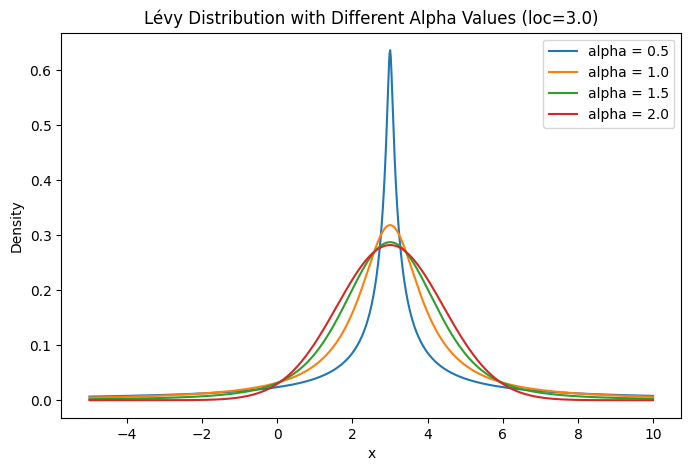

In [39]:
# Definir parámetros
alpha_values = [0.5, 1.0, 1.5, 2.0]  # Diferentes valores de alpha
beta = 0  
loc = 3.0  # LOC en 3.0
scale = 1  # ajuste de la escala

x = np.linspace(-5, 10, 1000)

# Graficar varias curvas de la distribución Lévy con diferentes valores de alpha
fig, ax = plt.subplots(figsize=(8, 5))

for alpha in alpha_values:
    levy_pdf = levy_stable.pdf(x, alpha, beta, loc=loc, scale=scale)
    ax.plot(x, levy_pdf, label=f"alpha = {alpha}")
    
ax.set_title("Lévy Distribution with Different Alpha Values (loc=3.0)")
ax.set_xlabel("x")
ax.set_ylabel("Density")
ax.legend()
plt.show()


# Activity 3: Lévy Distribution - Histogram + Curve

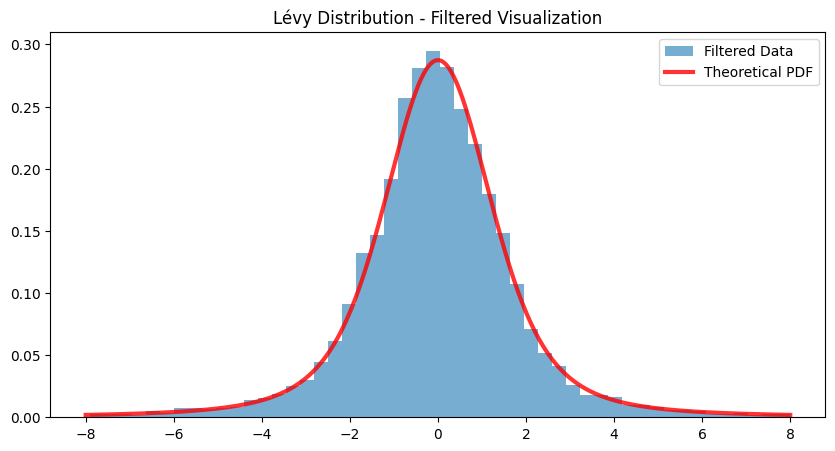

In [40]:


# Generar una muestra aleatoria
alpha, beta = 1.5, 0  # Parámetros de la distribución Lévy
size = 10000
r = levy_stable.rvs(alpha, beta, size=size)

# Definir un rango de visualización
visualization_range = (-8, 8)

# Filtrar los valores dentro del rango solo para la visualización
r_visualized = r[(r >= visualization_range[0]) & (r <= visualization_range[1])]

# Graficar usando los datos filtrados para la visualización
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(10)

# Histograma de los valores filtrados
ax.hist(r_visualized, bins=50, density=True, histtype='stepfilled', alpha=0.6, label="Filtered Data")

# Generar la curva teórica
x = np.linspace(visualization_range[0], visualization_range[1], 1000)
levy_pdf = levy_stable.pdf(x, alpha, beta)

# Superponer la curva teórica
ax.plot(x, levy_pdf, 'r-', lw=3, alpha=0.8, label="Theoretical PDF")

# Configurar título y leyenda
ax.set_title("Lévy Distribution - Filtered Visualization")
ax.legend(loc='best')

plt.show()


# Activity 4: Lévy Flight - Vec2d - 1 Trajectory

In [41]:
def levy_flight(n_steps=1000, alpha=1.5, scale=1.0, c = 0.5):
    pos = Vec2d(0, 0)
    trajectory = [pos.to_tuple()]
    angle = 0  # Ángulo inicial en radianes
    for i in range(n_steps):
        step_size = np.abs(levy_stable.rvs(alpha, 0, scale=scale))  # Tamaño del paso con Lévy
        delta_angle = wrapcauchy.rvs(c, scale=scale)  # Generar un ángulo con distribución de Cauchy
        angle += delta_angle
        step = Vec2d(step_size, 0).rotated(angle)
        pos += step
        trajectory.append(pos.to_tuple())

    print("Primeros 5 puntos de la trayectoria:", trajectory[:5])  # Verifica si hay datos

    x, y = zip(*trajectory)
    z = np.linspace(0, 1, len(x))  # Crear un eje Z para la visualización 3D
    
    print("Cantidad de puntos generados:", len(x))  # Debe ser n_steps + 1

    fig = go.Figure()
    fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Lévy Flight'))
    fig.show()

# Llamada de prueba
levy_flight()


Primeros 5 puntos de la trayectoria: [(0, 0), (np.float64(1.5441785243506148), np.float64(0.938088249223628)), (np.float64(1.2179909661856279), np.float64(1.2765706627444429)), (np.float64(0.2517476808978878), np.float64(1.9244655701103568)), (np.float64(-0.20167879147993273), np.float64(2.8478135738376977))]
Cantidad de puntos generados: 1001


# Activity 5: Correlated Random Walk - Vec2d - N Trajectories

In [42]:
def multiple_crw(n_traj=5, n_steps=1000, scale=1.0 , c = 0.5):
    fig = go.Figure()


    for i in range(n_traj):
        pos = Vec2d(0, 0)
        trajectory = [pos.to_tuple()]
        angle = 0
        
        for _ in range(n_steps):
            delta_angle = wrapcauchy.rvs(c, scale=scale * (i + 1))  # Diferente coeficiente de Cauchy para cada trayectoria
            angle += delta_angle
            step = Vec2d(1, 0).rotated(angle)
            pos += step
            trajectory.append(pos.to_tuple())

        x, y = zip(*trajectory)
        z = np.full(len(x), i)  # Usamos un valor fijo de Z para separar las trayectorias en 3D

        fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name=f'CRW {i+1}'))

    print(f"Generadas {n_traj} trayectorias con {n_steps} pasos cada una.")
    
    fig.update_layout(title="Multiple Correlated Random Walks",
                      scene=dict(zaxis_title="Trajectory ID"),
                      showlegend=True)
    fig.show()

# Llamada de prueba
multiple_crw()


Generadas 5 trayectorias con 1000 pasos cada una.


# Correlated Random Walks and Lévy Flights

## **Exercise 1: Correlated Random Walk (CRW)**
### **What is it?**  
A **Correlated Random Walk** (CRW) is a type of random walk where each step is influenced by the previous one. Unlike a purely random movement, in CRW the turns have some **correlation**, meaning the trajectory is not completely erratic.

### **How does it work?**
1. **Trajectory generation:**  
   - We start at position `(0,0)`.
   - A list is created to store trajectory points.

2. **Movement generation:**  
   - At each step, a **random angle** is drawn from the **Cauchy distribution** (this distribution allows occasional large turns).
   - A **movement vector** is calculated based on this angle.
   - The new vector is added to the previous position.

3. **Visualization:**  
   - The generated points are stored in `x` and `y` lists.
   - The trajectory is plotted using `plotly` in 2D.

### **What is it used for?**
- **Animal and robotic search models:**  
  - Many animals (like ants and seabirds) follow similar strategies when searching for food.
  - Autonomous robots can use CRW to efficiently explore areas.
  
- **Disease propagation models:**  
  - CRW is used to simulate how diseases spread among moving populations.

- **Human mobility studies:**  
  - Helps model movement patterns in cities to optimize **traffic flow and transportation systems**.

### **Real-world example:**  
Imagine a drone exploring an area to detect radio signals. If it moved in completely random directions, it would take longer to cover the area efficiently. A **CRW** allows it to maintain some coherence in its trajectory, improving exploration.

---

## **Exercise 4: Lévy Flight**
### **What is it?**  
A **Lévy flight** is a special type of random walk where most steps are small, but **occasionally** a large jump occurs. This allows the trajectory to efficiently cover large areas.

### **How does it work?**
1. **Each step has a random size** drawn from the **Lévy distribution**.
2. **The step direction is random**, simulating an exploratory flight.
3. **The trajectory is plotted in 3D using `plotly`**.

### **What is it used for?**
- **Optimization of search strategies in nature:**  
  - Animals like **sharks, seabirds, and monkeys** have been observed following Lévy flight patterns when searching for food.
  - Inspired **AI search algorithms** for data exploration.

- **Financial models:**  
  - Used in economics to describe abrupt movements in stock markets (price jumps in financial data).

- **Wireless network design:**  
  - Helps optimize **sensor placement** and **signal distribution** in wireless networks.

### **Real-world example:**  
If you are looking for a restaurant in a new city, you might walk for a while in one area, but if you don’t find anything interesting, you **make a big jump** to another location. This is how many animals search for food in nature.

---

## **Exercise 5: Multiple Correlated Random Walks (N CRW Trajectories)**
### **What is it?**  
Here we generate **multiple correlated random walks**, each with a different coefficient. This allows us to **compare how different levels of randomness affect movement**.

### **How does it work?**
1. **Multiple trajectories are generated**, each with a different randomness level.
2. **Each trajectory uses a different Cauchy coefficient.**
3. **All are visualized together in a 3D plot using `plotly`.**

### **What is it used for?**
- **Comparison of search strategies:**  
  - If several people are exploring a forest, some might walk in straight paths, while others might take more turns. This experiment helps compare different search strategies.

- **Diffusion and transport models:**  
  - Used in **physics** to model how **particles or molecules** move in turbulent environments.

- **Optimization in artificial intelligence:**  
  - Some **AI algorithms** use this type of strategy to **efficiently explore** possible solutions.

### **Real-world example:**  
Imagine a group of **robots exploring Mars** for signs of water. Some will follow straight paths, while others will explore more freely. This model helps study **which strategy is more efficient**.
